In [1]:
# load DESeq
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Warning message:


In [2]:
outdir = '/home/h1bennet/liverStrains/results/180412_RNA_4wk/'

In [3]:
counts_mat = read.table(paste0(outdir, "rnaseq_matrix_condenseGenes_exons_raw_mat_deseq.txt"),
                        sep='\t', header=TRUE, row.names=1)

col_data = read.table(paste0(outdir, "rnaseq_matrix_condenseGenes_exons_raw_deseq_col_info.txt"),
                      sep='\t', header=TRUE)

In [6]:
col_data$diet_time <- relevel(col_data$diet_time, ref='Control_0wk')

In [7]:
table(col_data$diet_time)


Control_0wk    AMLN_1wk    AMLN_4wk 
          3           2           2 

In [8]:
#create DESeq2 object

dds <- DESeqDataSetFromMatrix(countData = counts_mat,
                             colData = col_data,
                             design = ~ diet_time)

converting counts to integer mode


In [10]:
# run DESeq with full model
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [31]:
# diet effect for ncorwt
res <- results(dds, contrast=c('diet_time', 'AMLN_4wk', 'Control_0wk'), alpha = 0.01)
head(res)

log2 fold change (MLE): diet_time AMLN_4wk vs Control_0wk 
Wald test p-value: diet time AMLN 4wk vs Control 0wk 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE       stat     pvalue
              <numeric>      <numeric> <numeric>  <numeric>  <numeric>
NM_001329047 2956.38879     0.05074379 0.2153723  0.2356096 0.81373559
NM_172405     106.93663    -0.85548630 0.3453552 -2.4771202 0.01324473
NM_001168290  546.88451    -0.51632285 0.2396603 -2.1543948 0.03120922
NM_001166375 4137.91344     0.03812859 0.1833460  0.2079597 0.83526040
NM_178061      94.92579    -0.10413474 0.3485819 -0.2987383 0.76513977
NR_045798      32.93446     0.58982355 0.5023964  1.1740202 0.24038693
                  padj
             <numeric>
NM_001329047 0.9355022
NM_172405    0.1000213
NM_001168290 0.1782356
NM_001166375 0.9445208
NM_178061    0.9126578
NR_045798    0.5590481

In [32]:
summary(res)


out of 18164 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)     : 650, 3.6% 
LFC < 0 (down)   : 250, 1.4% 
outliers [1]     : 0, 0% 
low counts [2]   : 3817, 21% 
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [33]:
res_ordered <- res[order(res$padj), ]

In [34]:
head(res_ordered)

log2 fold change (MLE): diet_time AMLN_4wk vs Control_0wk 
Wald test p-value: diet time AMLN 4wk vs Control 0wk 
DataFrame with 6 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat       pvalue
             <numeric>      <numeric> <numeric> <numeric>    <numeric>
NM_009692    2034.2922       5.618532 0.2973916  18.89270 1.309636e-79
NM_001305585 1192.8420       4.126909 0.2307961  17.88119 1.652735e-71
NM_008256    1031.3051       5.005848 0.2862872  17.48540 1.850978e-68
NM_009078     362.3780       6.295782 0.3621849  17.38278 1.114114e-67
NM_009244    1095.8088       4.957436 0.2940965  16.85649 9.400419e-64
NM_133653     637.0667       4.484331 0.2759464  16.25073 2.207084e-59
                     padj
                <numeric>
NM_009692    1.878934e-75
NM_001305585 1.185590e-67
NM_008256    8.851994e-65
NM_009078    3.996048e-64
NM_009244    2.697356e-60
NM_133653    5.277505e-56

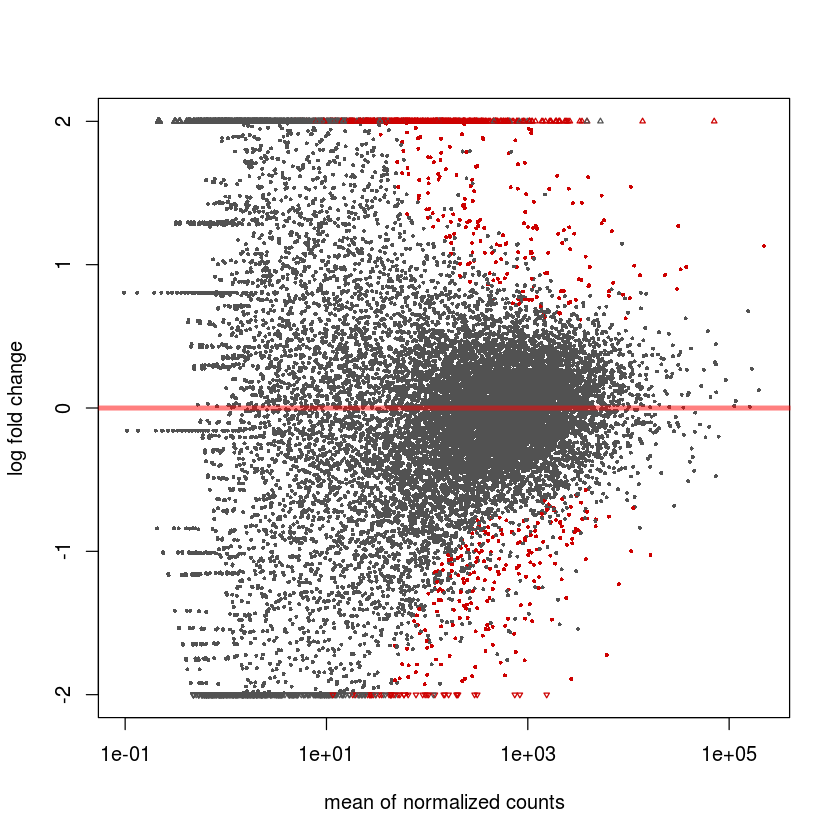

In [35]:
plotMA(res, ylim=c(-2,2))

In [36]:
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/rnaseq_c57bl6_amln_4wk_deseq_results.txt"))

In [37]:
# diet effect for ncorwt
res <- results(dds, contrast=c('diet_time', 'AMLN_4wk', 'AMLN_1wk'), alpha = 0.01)
head(res)

log2 fold change (MLE): diet_time AMLN_4wk vs AMLN_1wk 
Wald test p-value: diet_time AMLN_4wk vs AMLN_1wk 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE       stat       pvalue
              <numeric>      <numeric> <numeric>  <numeric>    <numeric>
NM_001329047 2956.38879    -0.06894041 0.2357359 -0.2924476 7.699444e-01
NM_172405     106.93663    -0.19473551 0.3785470 -0.5144288 6.069522e-01
NM_001168290  546.88451     0.30919293 0.2633719  1.1739783 2.404037e-01
NM_001166375 4137.91344    -0.94041852 0.2003756 -4.6932796 2.688596e-06
NM_178061      94.92579     0.19561098 0.3813873  0.5128933 6.080260e-01
NR_045798      32.93446     0.27584793 0.5414902  0.5094237 6.104553e-01
                     padj
                <numeric>
NM_001329047 0.9077688312
NM_172405    0.8231809030
NM_001168290 0.5342059264
NM_001166375 0.0002855862
NM_178061    0.8234307349
NR_045798    0.8250824035

In [38]:
summary(res)


out of 18164 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)     : 211, 1.2% 
LFC < 0 (down)   : 271, 1.5% 
outliers [1]     : 0, 0% 
low counts [2]   : 5205, 29% 
(mean count < 11)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [39]:
res_ordered <- res[order(res$padj), ]

In [40]:
head(res_ordered)

log2 fold change (MLE): diet_time AMLN_4wk vs AMLN_1wk 
Wald test p-value: diet_time AMLN_4wk vs AMLN_1wk 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE       stat       pvalue
              <numeric>      <numeric> <numeric>  <numeric>    <numeric>
NM_001162938  244.53496      -6.010271 0.4546943 -13.218267 6.883193e-40
NM_001324534  217.00242      -8.376054 0.8890123  -9.421752 4.436223e-21
NM_001281818  115.26008      -3.448354 0.4121764  -8.366210 5.950104e-17
NR_037964      76.83161      -5.334251 0.6547265  -8.147297 3.721493e-16
NM_001039544 1921.26316      -2.365973 0.3306827  -7.154813 8.378692e-13
NM_001001884  661.08581       1.958971 0.2737506   7.156042 8.303994e-13
                     padj
                <numeric>
NM_001162938 8.919930e-36
NM_001324534 2.874451e-17
NM_001281818 2.570247e-13
NR_037964    1.205671e-12
NM_001039544 1.357243e-09
NM_001001884 1.357243e-09

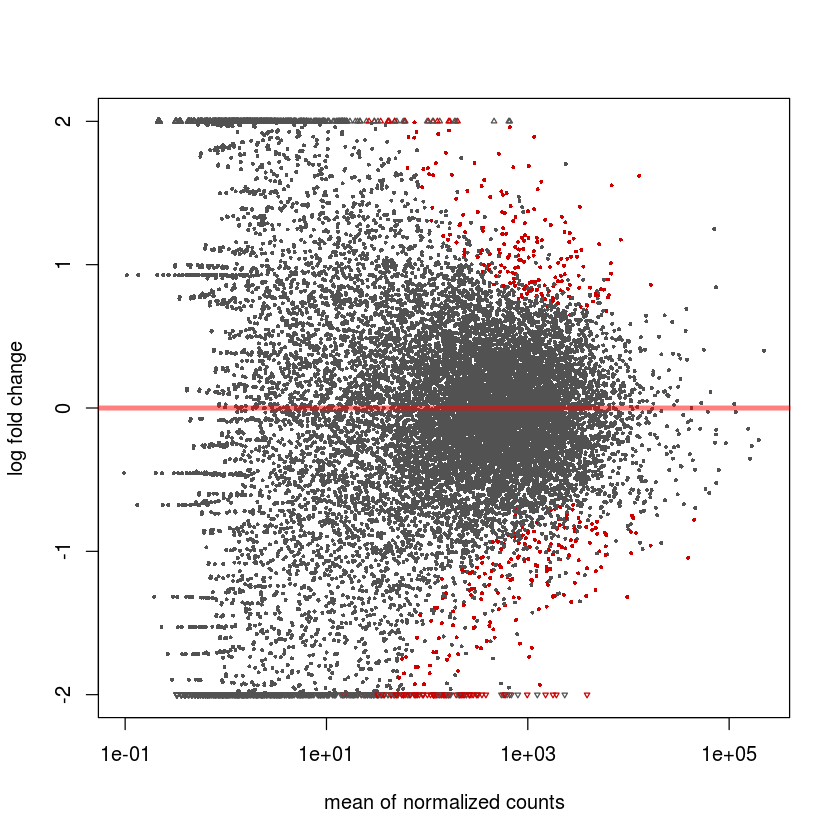

In [41]:
plotMA(res, ylim=c(-2,2))

In [42]:
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/rnaseq_c57bl6_amln_4wk_1wk_deseq_results.txt"))

In [43]:
# diet effect for ncorwt
res <- results(dds, contrast=c('diet_time', 'AMLN_1wk', 'Control_0wk'), alpha = 0.01)
head(res)

log2 fold change (MLE): diet_time AMLN_1wk vs Control_0wk 
Wald test p-value: diet time AMLN 1wk vs Control 0wk 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE       stat       pvalue
              <numeric>      <numeric> <numeric>  <numeric>    <numeric>
NM_001329047 2956.38879      0.1196842 0.2147632  0.5572846 5.773330e-01
NM_172405     106.93663     -0.6607508 0.3290975 -2.0077660 4.466816e-02
NM_001168290  546.88451     -0.8255158 0.2373318 -3.4783199 5.045673e-04
NM_001166375 4137.91344      0.9785471 0.1824063  5.3646550 8.110408e-08
NM_178061      94.92579     -0.2997457 0.3391436 -0.8838313 3.767873e-01
NR_045798      32.93446      0.3139756 0.4884503  0.6427995 5.203542e-01
                     padj
                <numeric>
NM_001329047 7.928589e-01
NM_172405    1.783402e-01
NM_001168290 5.754393e-03
NM_001166375 2.295069e-06
NM_178061    6.444591e-01
NR_045798    7.554667e-01

In [44]:
summary(res)


out of 18164 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)     : 931, 5.1% 
LFC < 0 (down)   : 506, 2.8% 
outliers [1]     : 0, 0% 
low counts [2]   : 3817, 21% 
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [45]:
res_ordered <- res[order(res$padj), ]

In [49]:
head(res_ordered, 20)

log2 fold change (MLE): diet_time AMLN_1wk vs Control_0wk 
Wald test p-value: diet time AMLN 1wk vs Control 0wk 
DataFrame with 20 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat        pvalue
             <numeric>      <numeric> <numeric> <numeric>     <numeric>
NM_001305585 1192.8420       5.221841 0.2288131  22.82142 2.810105e-115
NM_009244    1095.8088       6.631229 0.2916241  22.73896 1.845421e-114
NM_009692    2034.2922       6.671968 0.2965327  22.49994 4.156436e-112
NM_001039544 1921.2632       6.489372 0.3157298  20.55356  7.151562e-94
NM_001159487  722.0865       6.691260 0.3294129  20.31269  9.931990e-92
...                ...            ...       ...       ...           ...
NM_009078     362.3780       6.202759 0.3607320  17.19492  2.898382e-66
NM_013697     910.5774       5.631545 0.3308549  17.02119  5.719269e-65
NM_008096    1702.4460       5.733907 0.3492092  16.41969  1.382626e-60
NM_029562     310.5402       7.318170 0.4488722  16.30346 

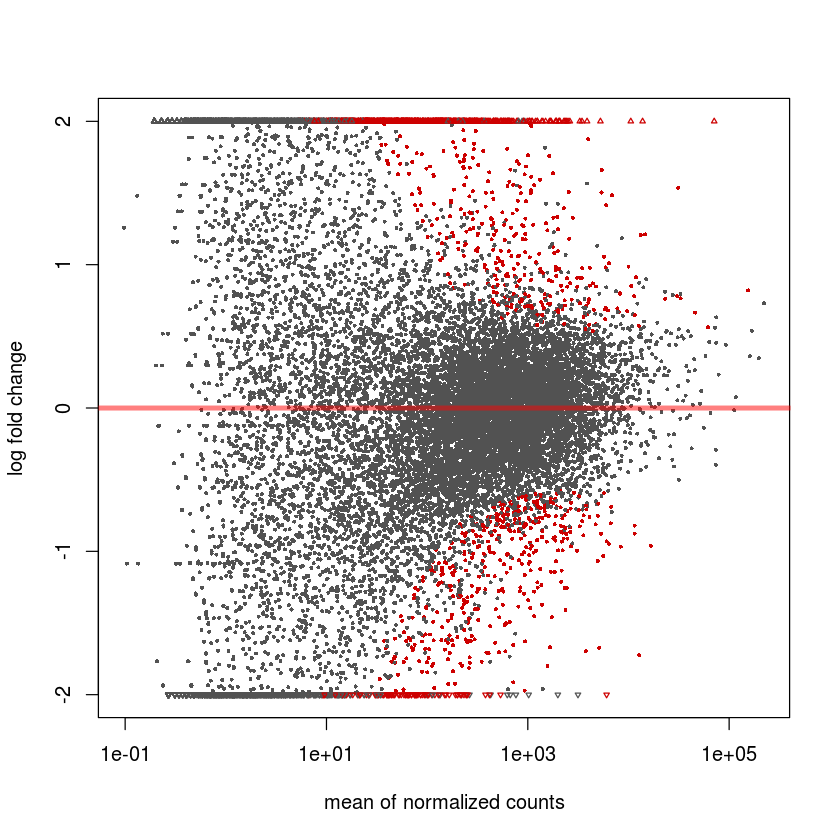

In [47]:
plotMA(res, ylim=c(-2,2))

In [48]:
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/rnaseq_c57bl6_amln_1wk_deseq_results.txt"))